In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedsa21","key":"7a4ef98eced9fccbfd5b0c4ab05cfdf0"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d ammarsayedtaha/arabic-sign-language-dataset-2022


Dataset URL: https://www.kaggle.com/datasets/ammarsayedtaha/arabic-sign-language-dataset-2022
License(s): CC-BY-SA-4.0
 99% 801M/808M [00:20<00:00, 48.1MB/s]
100% 808M/808M [00:20<00:00, 41.2MB/s]


In [ ]:
!unzip /content/arabic-sign-language-dataset-2022.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/datasets/valid/images/23_19_M_haa_7.jpg  
  inflating: /content/datasets/valid/images/23_19_M_haa_8.jpg  
  inflating: /content/datasets/valid/images/23_19_M_jeem_0.jpg  
  inflating: /content/datasets/valid/images/23_19_M_jeem_1.jpg  
  inflating: /content/datasets/valid/images/23_19_M_jeem_2.jpg  
  inflating: /content/datasets/valid/images/23_19_M_jeem_3.jpg  
  inflating: /content/datasets/valid/images/23_19_M_jeem_4.jpg  
  inflating: /content/datasets/valid/images/23_19_M_jeem_5.jpg  
  inflating: /content/datasets/valid/images/23_19_M_jeem_6.jpg  
  inflating: /content/datasets/valid/images/23_19_M_jeem_7.jpg  
  inflating: /content/datasets/valid/images/23_19_M_jeem_8.jpg  
  inflating: /content/datasets/valid/images/23_19_M_kaaf_0.jpg  
  inflating: /content/datasets/valid/images/23_19_M_kaaf_1.jpg  
  inflating: /content/datasets/valid/images/23_19_M_kaaf_2.jpg  
  inflating: /content/datasets/valid/imag

In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.7/901.7 kB 20.9 MB/s eta 0:00:00


In [ ]:
import os
import random
import shutil


main_dir = "datasets"  # put your main directory path here
valid_images_dir = os.path.join(main_dir, "valid/images")
valid_labels_dir = os.path.join(main_dir, "valid/labels")
test_images_dir = os.path.join(main_dir, "test/images")
test_labels_dir = os.path.join(main_dir, "test/labels")
new_valid_images_dir = os.path.join(main_dir, "new_valid/images")
new_valid_labels_dir = os.path.join(main_dir, "new_valid/labels")
val_file_path = os.path.join(main_dir, "val.txt")
######## new directories to store the data ################
os.makedirs(test_images_dir, exist_ok=True) # Changed 'matkedirs' to 'makedirs'
os.makedirs(test_labels_dir, exist_ok=True)
os.makedirs(new_valid_images_dir, exist_ok=True)
os.makedirs(new_valid_labels_dir, exist_ok=True)


#Get all image files in the valid/images directory###ai###
all_images = sorted([f for f in os.listdir(valid_images_dir) if f.endswith((".jpg", ".png"))])

# picking random images
random.seed(42)
random.shuffle(all_images)

test_images = all_images[:2346]
new_valid_images = all_images[2346:]

# Move files to respective directories ##ai##
def move_files(image_list, src_images_dir, src_labels_dir, dest_images_dir, dest_labels_dir):
    for image in image_list:
        image_path = os.path.join(src_images_dir, image)
        label_path = os.path.join(src_labels_dir, image.replace(".jpg", ".txt").replace(".png", ".txt"))

        # Move image
        shutil.move(image_path, os.path.join(dest_images_dir, image))

        # Move corresponding label
        if os.path.exists(label_path):
            shutil.move(label_path, os.path.join(dest_labels_dir, os.path.basename(label_path)))

# Move test files
move_files(test_images, valid_images_dir, valid_labels_dir, test_images_dir, test_labels_dir)

# Move new validation files
move_files(new_valid_images, valid_images_dir, valid_labels_dir, new_valid_images_dir, new_valid_labels_dir)

# Update val file
with open(val_file_path, "r") as val_file:
    val_paths = val_file.readlines()

# Filter and update paths for new validation set
new_valid_paths = [
    path for path in val_paths
    if os.path.basename(path.strip()) in new_valid_images
]

with open(val_file_path, "w") as val_file:
    val_file.writelines(new_valid_paths)

print(f"Split complete! {len(test_images)} images moved to test set.")
print(f"Remaining {len(new_valid_images)} images kept in new validation set.")


Split complete! 2346 images moved to test set.
Remaining 1901 images kept in new validation set.


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
#############################################################
#############################################################
model.train(
    data='/content/datasets/sign.yaml',
    epochs=10,
    batch=16,
    imgsz=640,
    project='/kaggle/working/runs/train',
    name='best_model',
    exist_ok=True,  #overwriting of the run directory
    pretrained=True,
)


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/sign.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working/runs/train, name=best_model, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

train: Scanning /content/datasets/train/labels.cache... 9955 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9955/9955 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/valid/labels.cache... 4247 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4247/4247 [00:00<?, ?it/s]


Plotting labels to /kaggle/working/runs/train/best_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000278, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/runs/train/best_model
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.63G     0.7613      4.204      1.165          3        640: 100%|██████████| 623/623 [03:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:53<00:00,  2.50it/s]


                   all       4247       4252      0.485      0.594      0.559      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.45G     0.6535      2.445      1.036          3        640: 100%|██████████| 623/623 [03:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:38<00:00,  3.49it/s]

                   all       4247       4252       0.73      0.753       0.81      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.44G     0.6248      1.665     0.9982          3        640: 100%|██████████| 623/623 [03:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:38<00:00,  3.41it/s]

                   all       4247       4252      0.832      0.832      0.895      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.44G     0.5895      1.247     0.9689          3        640: 100%|██████████| 623/623 [03:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:38<00:00,  3.49it/s]


                   all       4247       4252      0.866      0.871      0.932      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.43G     0.5563     0.9792     0.9478          3        640: 100%|██████████| 623/623 [03:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:38<00:00,  3.47it/s]


                   all       4247       4252       0.92      0.889      0.959      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.43G      0.531     0.8204     0.9327          3        640: 100%|██████████| 623/623 [03:08<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:38<00:00,  3.50it/s]


                   all       4247       4252      0.912      0.916      0.959      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.43G     0.5069     0.7006     0.9179          3        640: 100%|██████████| 623/623 [03:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:38<00:00,  3.48it/s]

                   all       4247       4252      0.926      0.921      0.963      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.43G      0.492     0.6236     0.9127          3        640: 100%|██████████| 623/623 [03:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:39<00:00,  3.41it/s]

                   all       4247       4252      0.954      0.937      0.979      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.43G     0.4735     0.5639     0.9017          3        640: 100%|██████████| 623/623 [03:10<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:37<00:00,  3.51it/s]

                   all       4247       4252      0.955       0.94      0.981      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.43G     0.4575     0.5178     0.8937          3        640: 100%|██████████| 623/623 [03:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:37<00:00,  3.58it/s]


                   all       4247       4252      0.943      0.956      0.979      0.816

10 epochs completed in 0.645 hours.
Optimizer stripped from /kaggle/working/runs/train/best_model/weights/last.pt, 6.3MB
Optimizer stripped from /kaggle/working/runs/train/best_model/weights/best.pt, 6.3MB

Validating /kaggle/working/runs/train/best_model/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,011,888 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:45<00:00,  2.91it/s]


                   all       4247       4252      0.955       0.94      0.981      0.816
                   ain        133        133      0.992       0.94      0.988      0.805
                    al        135        136      0.971       0.98      0.991      0.906
                 aleff        134        136      0.994      0.971      0.994      0.881
                    bb        135        137      0.956      0.963       0.99      0.878
                   dal        111        111      0.978      0.805      0.962      0.757
                   dha        135        135      0.984      0.917      0.983       0.84
                  dhad        130        130       0.97      0.946      0.987      0.838
                    fa        135        135      0.864      0.846      0.938      0.775
                  gaaf        134        134      0.874      0.828      0.927      0.771
                 ghain        135        135      0.965          1      0.986       0.82
                    h

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e9e1ee9c30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8s.pt')
#############################################################
#############################################################
model.train(
    data='/content/datasets/sign.yaml',
    epochs=40,
    batch=32,
    imgsz=640,
    project='/kaggle/working/runs/train',
    name='best_model_2',
    exist_ok=True,  #overwriting of the run directory
    pretrained=True,
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 280MB/s]


Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/sign.yaml, epochs=40, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working/runs/train, name=best_model_2, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]


Overriding model.yaml nc=80 with nc=32

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.4MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 9955 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9955/9955 [00:06<00:00, 1606.82it/s]


train: New cache created: /content/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/new_valid/labels... 1901 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1901/1901 [00:03<00:00, 605.88it/s]


val: New cache created: /content/datasets/new_valid/labels.cache
Plotting labels to /kaggle/working/runs/train/best_model_2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000278, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/runs/train/best_model_2
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      7.32G     0.9277      3.912      1.306          1        640: 100%|██████████| 312/312 [03:39<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.40it/s]


                   all       1901       1901      0.634      0.654      0.702      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      7.31G     0.7914       1.68      1.142          6        640: 100%|██████████| 312/312 [03:37<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:19<00:00,  1.50it/s]

                   all       1901       1901      0.779      0.789      0.867      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40       7.3G     0.7896      1.357      1.116          5        640: 100%|██████████| 312/312 [03:32<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:19<00:00,  1.54it/s]

                   all       1901       1901      0.806      0.794      0.878      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      7.29G     0.7636       1.22      1.089          6        640: 100%|██████████| 312/312 [03:32<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.37it/s]

                   all       1901       1901      0.871      0.854      0.936      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      7.61G     0.7344      1.089       1.07          7        640: 100%|██████████| 312/312 [03:30<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.49it/s]

                   all       1901       1901       0.86      0.857      0.926      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40       7.3G     0.7154      1.003      1.058          7        640: 100%|██████████| 312/312 [03:32<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:19<00:00,  1.51it/s]

                   all       1901       1901      0.892      0.888      0.955      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      7.29G     0.6864     0.9279      1.039          4        640: 100%|██████████| 312/312 [03:30<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.41it/s]

                   all       1901       1901      0.927      0.904      0.967      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40       7.3G     0.6843     0.9023      1.037          5        640: 100%|██████████| 312/312 [03:30<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.49it/s]

                   all       1901       1901      0.938      0.913      0.968      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      7.61G     0.6717     0.8493      1.033          8        640: 100%|██████████| 312/312 [03:30<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:22<00:00,  1.35it/s]

                   all       1901       1901       0.92      0.939      0.972      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      7.29G     0.6551     0.8171      1.023          3        640: 100%|██████████| 312/312 [03:29<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.44it/s]

                   all       1901       1901      0.934      0.928      0.974      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40       7.6G     0.6568     0.7965      1.023          3        640: 100%|██████████| 312/312 [03:31<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.50it/s]

                   all       1901       1901      0.946       0.94      0.978      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      7.29G     0.6452     0.7815      1.021          7        640: 100%|██████████| 312/312 [03:34<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.49it/s]

                   all       1901       1901      0.953      0.935      0.979      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      7.61G     0.6351     0.7552      1.015          7        640: 100%|██████████| 312/312 [03:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.38it/s]

                   all       1901       1901      0.954      0.931      0.979      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40       7.3G     0.6257     0.7272      1.008          5        640: 100%|██████████| 312/312 [03:35<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.38it/s]

                   all       1901       1901      0.932      0.952      0.977      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      7.61G     0.6184     0.7127      1.007          7        640: 100%|██████████| 312/312 [03:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:19<00:00,  1.51it/s]

                   all       1901       1901      0.961      0.955      0.982      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      7.29G     0.6136     0.6956      1.004          4        640: 100%|██████████| 312/312 [03:34<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.42it/s]

                   all       1901       1901       0.95      0.953      0.982      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40       7.3G     0.6136      0.697      1.002          8        640: 100%|██████████| 312/312 [03:34<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.43it/s]

                   all       1901       1901       0.96      0.948      0.981       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      7.61G      0.599      0.667     0.9972          6        640: 100%|██████████| 312/312 [03:29<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.45it/s]

                   all       1901       1901      0.958      0.963      0.986      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      7.61G     0.5928      0.655     0.9927          3        640: 100%|██████████| 312/312 [03:33<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:22<00:00,  1.36it/s]

                   all       1901       1901      0.965       0.95      0.984      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      7.29G     0.5905     0.6404     0.9887          5        640: 100%|██████████| 312/312 [03:30<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:22<00:00,  1.35it/s]

                   all       1901       1901      0.962      0.963      0.986      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      7.29G     0.5851     0.6318     0.9905          1        640: 100%|██████████| 312/312 [03:33<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.41it/s]

                   all       1901       1901      0.965       0.95      0.982       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40       7.6G     0.5825     0.6188     0.9898          6        640: 100%|██████████| 312/312 [03:36<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:19<00:00,  1.52it/s]

                   all       1901       1901      0.963      0.963      0.986      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      7.61G     0.5691     0.6076     0.9841          6        640: 100%|██████████| 312/312 [03:36<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.48it/s]

                   all       1901       1901      0.973       0.96      0.986      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40       7.3G      0.569        0.6     0.9832          4        640: 100%|██████████| 312/312 [03:34<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.47it/s]

                   all       1901       1901      0.967      0.959      0.984      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      7.61G       0.57     0.5914     0.9857          7        640: 100%|██████████| 312/312 [03:32<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.47it/s]

                   all       1901       1901      0.973      0.957      0.985      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      7.61G     0.5599     0.5803     0.9808          5        640: 100%|██████████| 312/312 [03:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.49it/s]

                   all       1901       1901      0.967      0.969      0.987      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40       7.3G     0.5564      0.569     0.9752          6        640: 100%|██████████| 312/312 [03:34<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:19<00:00,  1.53it/s]

                   all       1901       1901      0.969      0.967      0.987      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      7.61G      0.549     0.5646     0.9739          8        640: 100%|██████████| 312/312 [03:32<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.41it/s]

                   all       1901       1901      0.964      0.969      0.985      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      7.61G      0.539     0.5497     0.9684          8        640: 100%|██████████| 312/312 [03:36<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:19<00:00,  1.53it/s]

                   all       1901       1901      0.972      0.967      0.987      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      7.61G      0.535      0.533     0.9677          4        640: 100%|██████████| 312/312 [03:32<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.39it/s]

                   all       1901       1901      0.973       0.97      0.988      0.839


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      7.92G     0.4097     0.2317     0.8759          3        640: 100%|██████████| 312/312 [03:26<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:19<00:00,  1.52it/s]

                   all       1901       1901       0.97      0.969      0.987      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      7.61G     0.4028     0.2186     0.8745          3        640: 100%|██████████| 312/312 [03:25<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:19<00:00,  1.51it/s]

                   all       1901       1901      0.974       0.96      0.987      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      7.92G     0.3933     0.2122     0.8648          3        640: 100%|██████████| 312/312 [03:26<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:19<00:00,  1.52it/s]

                   all       1901       1901      0.971       0.97      0.987      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      7.61G     0.3884     0.2088     0.8658          3        640: 100%|██████████| 312/312 [03:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.40it/s]

                   all       1901       1901      0.968       0.98      0.987      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40       7.3G     0.3783     0.1987     0.8619          3        640: 100%|██████████| 312/312 [03:26<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.46it/s]

                   all       1901       1901      0.973      0.972      0.986      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40       7.6G     0.3735     0.1957      0.855          3        640: 100%|██████████| 312/312 [03:24<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.49it/s]

                   all       1901       1901      0.975       0.97      0.986      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      7.29G      0.367     0.1885     0.8531          3        640: 100%|██████████| 312/312 [03:25<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.41it/s]

                   all       1901       1901      0.979       0.97      0.987      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      7.61G     0.3601     0.1839     0.8542          3        640: 100%|██████████| 312/312 [03:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:22<00:00,  1.36it/s]

                   all       1901       1901       0.98      0.972      0.986      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40       7.6G     0.3547     0.1804     0.8489          3        640: 100%|██████████| 312/312 [03:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.41it/s]

                   all       1901       1901      0.981      0.971      0.987      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      7.61G     0.3514     0.1773     0.8487          3        640: 100%|██████████| 312/312 [03:24<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.39it/s]

                   all       1901       1901      0.975      0.974      0.987      0.853



40 epochs completed in 2.596 hours.
Optimizer stripped from /kaggle/working/runs/train/best_model_2/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/runs/train/best_model_2/weights/best.pt, 22.5MB

Validating /kaggle/working/runs/train/best_model_2/weights/best.pt...
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,137,968 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:22<00:00,  1.36it/s]


                   all       1901       1901      0.975      0.974      0.987      0.853
                   ain         55         55      0.994      0.982      0.995      0.843
                    al         62         62      0.974      0.984      0.974      0.921
                 aleff         62         62      0.984      0.968       0.99      0.916
                    bb         60         60      0.981      0.967      0.993      0.919
                   dal         48         48      0.972      0.917      0.961      0.806
                   dha         62         62       0.99      0.968      0.981      0.869
                  dhad         57         57      0.963      0.982      0.971      0.858
                    fa         58         58      0.934      0.969       0.99      0.848
                  gaaf         54         54      0.981      0.975       0.99      0.861
                 ghain         59         59      0.978          1      0.995      0.853
                    h

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a4dbe5b42e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,

In [ ]:
from ultralytics import YOLO
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path

# Load the trained YOLO model
# Check if the best.pt file exists, if not, use the last.pt file instead
model_path = '/kaggle/working/runs/train/best_model_2/weights/best.pt'
if not os.path.exists(model_path):
    model_path = '/kaggle/working/runs/train/best_model_2/weights/last.pt'
    print(f"Warning: 'best.pt' not found, using 'last.pt' instead.")

model = YOLO(model_path)

# Define paths to the test dataset
test_images_dir = '/content/datasets/test/images'
test_labels_dir = '/content/datasets/test/labels'

# Load test images
test_images = list(Path(test_images_dir).glob('*.jpg'))  # Adjust for PNG if necessary

# Initialize storage for predictions and ground truth
all_preds = []
all_targets = []

# Perform inference and calculate metrics ##ai##
for image_path in test_images:
    # Predict with the model
    results = model.predict(source=str(image_path), save=False, conf=0.25)

    # Extract predictions
    predicted_boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding box predictions
    predicted_classes = results[0].boxes.cls.cpu().numpy().astype(int)  # Predicted class IDs
    # Load corresponding ground truth labels
    label_file = os.path.join(test_labels_dir, os.path.basename(image_path).replace('.jpg', '.txt'))
    if not os.path.exists(label_file):
        continue  # Skip if label file does not exist

    with open(label_file, 'r') as f:
        ground_truth_classes = [int(line.split()[0]) for line in f.readlines()]  # Extract class IDs

    # Match predictions to ground truth (simplified: one-to-one match by order)
    # Assumes the same number of predictions as ground truth for simplicity
    for pred_class, true_class in zip(predicted_classes, ground_truth_classes):
        all_preds.append(pred_class)
        all_targets.append(true_class)

# Calculate Metrics
accuracy = accuracy_score(all_targets, all_preds)
precision = precision_score(all_targets, all_preds, average='weighted', zero_division=0)
recall = recall_score(all_targets, all_preds, average='weighted', zero_division=0)
f1 = f1_score(all_targets, all_preds, average='weighted', zero_division=0)

# Confusion Matrix
conf_matrix = confusion_matrix(all_targets, all_preds)

# Print Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix (Array Format):")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(all_targets), yticklabels=np.unique(all_targets))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
import shutil
source_path = '/kaggle/working/runs/train/best_model_2/weights/best.pt'
if not os.path.exists(source_path):
    source_path = '/kaggle/working/runs/train/best_model_2/weights/last.pt'
    print(f"Warning: 'best.pt' not found, using 'last.pt' instead.")

destination_path = '/content/drive/MyDrive/best_model_2.pt'


shutil.copy(source_path, destination_path)
print("Best weights saved to Google Drive!")

NameError: name 'os' is not defined

In [ ]:
from ultralytics import YOLO
!yolo weights download yolov11s.pt

model = YOLO('yolo11s.pt')
#############################################################
#############################################################
model.train(
    data='/content/datasets/sign.yaml',
    epochs=40,
    batch=32,
    imgsz=640,
    project='/kaggle/working/runs/train',
    name='best_model_2_fromYolo11',
    exist_ok=True,  #overwriting of the run directory
    pretrained=True,
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 900, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 485, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'weights' is not a valid YOLO argument. Similar arguments are i.e. ['weight_decay=0.0005'].

    Arguments received: ['yolo', 'weights', 'download', 'yolov11s.pt']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS


100%|██████████| 18.4M/18.4M [00:00<00:00, 208MB/s]


Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/sign.yaml, epochs=40, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working/runs/train, name=best_model_2_fromYolo11, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

100%|██████████| 755k/755k [00:00<00:00, 20.1MB/s]


Overriding model.yaml nc=80 with nc=32

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 117MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 9955 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9955/9955 [00:05<00:00, 1687.41it/s]


train: New cache created: /content/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/new_valid/labels... 1901 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1901/1901 [00:02<00:00, 752.44it/s]


val: New cache created: /content/datasets/new_valid/labels.cache
Plotting labels to /kaggle/working/runs/train/best_model_2_fromYolo11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000278, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/runs/train/best_model_2_fromYolo11
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      8.58G     0.9035      4.013      1.259          1        640: 100%|██████████| 312/312 [03:55<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.38it/s]

                   all       1901       1901      0.545      0.629      0.636      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      8.57G     0.8014       1.67      1.131          6        640: 100%|██████████| 312/312 [03:55<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.39it/s]

                   all       1901       1901      0.784      0.788       0.86      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      8.59G     0.8128      1.384      1.123          5        640: 100%|██████████| 312/312 [03:46<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.41it/s]

                   all       1901       1901      0.757      0.761      0.859      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      8.57G      0.789      1.257      1.105          6        640: 100%|██████████| 312/312 [03:48<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.44it/s]

                   all       1901       1901      0.817      0.815       0.89      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      8.59G     0.7575      1.143      1.087          7        640: 100%|██████████| 312/312 [03:45<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.43it/s]

                   all       1901       1901      0.864      0.834      0.919      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      8.56G     0.7424      1.058      1.075          7        640: 100%|██████████| 312/312 [03:51<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:22<00:00,  1.31it/s]

                   all       1901       1901      0.862      0.863      0.923      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      8.59G     0.7066     0.9743      1.052          4        640: 100%|██████████| 312/312 [03:43<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.37it/s]

                   all       1901       1901      0.901      0.906       0.96      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      8.57G     0.6994      0.927      1.043          5        640: 100%|██████████| 312/312 [03:58<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:23<00:00,  1.29it/s]

                   all       1901       1901      0.909      0.902      0.958      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      8.59G     0.6944      0.892      1.044          8        640: 100%|██████████| 312/312 [03:45<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:22<00:00,  1.33it/s]

                   all       1901       1901      0.942      0.923      0.973      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      8.56G     0.6747     0.8523      1.034          3        640: 100%|██████████| 312/312 [03:49<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.39it/s]

                   all       1901       1901      0.935      0.921      0.972      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      8.59G     0.6714     0.8319      1.028          3        640: 100%|██████████| 312/312 [03:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.44it/s]

                   all       1901       1901      0.933      0.923      0.968      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      8.56G     0.6622     0.8168      1.029          7        640: 100%|██████████| 312/312 [03:46<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.44it/s]

                   all       1901       1901      0.943       0.94      0.975      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      8.59G     0.6477     0.7862      1.023          7        640: 100%|██████████| 312/312 [03:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.42it/s]

                   all       1901       1901      0.929      0.927      0.967       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      8.56G     0.6433     0.7503      1.014          5        640: 100%|██████████| 312/312 [03:45<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.49it/s]

                   all       1901       1901      0.946      0.934      0.977      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      8.59G      0.639     0.7477      1.015          7        640: 100%|██████████| 312/312 [03:43<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.46it/s]

                   all       1901       1901      0.945      0.948      0.981       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      8.56G     0.6311     0.7206      1.011          4        640: 100%|██████████| 312/312 [03:47<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:22<00:00,  1.36it/s]

                   all       1901       1901      0.959      0.947      0.983      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      8.59G     0.6278      0.717       1.01          8        640: 100%|██████████| 312/312 [03:43<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.38it/s]

                   all       1901       1901      0.962      0.954      0.984      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      8.57G     0.6112     0.6907      1.004          6        640: 100%|██████████| 312/312 [03:42<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:25<00:00,  1.19it/s]

                   all       1901       1901      0.961      0.957      0.985      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      8.59G     0.6088     0.6778     0.9994          3        640: 100%|██████████| 312/312 [03:42<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.41it/s]

                   all       1901       1901      0.954      0.955      0.979      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      8.57G     0.6027     0.6644     0.9953          5        640: 100%|██████████| 312/312 [03:43<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:24<00:00,  1.22it/s]

                   all       1901       1901      0.959      0.955      0.983      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      8.59G     0.6013     0.6498      0.997          1        640: 100%|██████████| 312/312 [03:49<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.44it/s]

                   all       1901       1901      0.963      0.958      0.985      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      8.56G     0.5989     0.6423     0.9966          6        640: 100%|██████████| 312/312 [03:46<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:22<00:00,  1.32it/s]

                   all       1901       1901      0.963      0.954      0.986      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      8.59G     0.5863     0.6273     0.9921          6        640: 100%|██████████| 312/312 [03:41<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:22<00:00,  1.33it/s]

                   all       1901       1901      0.963      0.961      0.984      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      8.56G     0.5826      0.619     0.9897          4        640: 100%|██████████| 312/312 [03:45<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:22<00:00,  1.31it/s]

                   all       1901       1901      0.974      0.965      0.985      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      8.59G     0.5847     0.6135     0.9934          7        640: 100%|██████████| 312/312 [03:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.46it/s]

                   all       1901       1901      0.965      0.977      0.986      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      8.56G     0.5741     0.6036     0.9871          5        640: 100%|██████████| 312/312 [03:45<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.43it/s]

                   all       1901       1901      0.969      0.968      0.989      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      8.59G       0.57     0.5917     0.9815          6        640: 100%|██████████| 312/312 [03:46<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.41it/s]

                   all       1901       1901      0.971      0.964      0.986      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      8.56G     0.5608     0.5802     0.9795          8        640: 100%|██████████| 312/312 [03:45<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:22<00:00,  1.36it/s]

                   all       1901       1901      0.968      0.972      0.989      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      8.59G     0.5533     0.5688     0.9749          8        640: 100%|██████████| 312/312 [03:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.38it/s]

                   all       1901       1901      0.971      0.974      0.988       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      8.56G     0.5465     0.5532     0.9731          4        640: 100%|██████████| 312/312 [03:48<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.43it/s]

                   all       1901       1901      0.975      0.969      0.989      0.844


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      8.56G     0.4199       0.23     0.8784          3        640: 100%|██████████| 312/312 [03:47<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:23<00:00,  1.29it/s]

                   all       1901       1901      0.968      0.968      0.987      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      8.56G     0.4134      0.222     0.8786          3        640: 100%|██████████| 312/312 [03:39<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.44it/s]

                   all       1901       1901      0.977      0.962      0.987       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      8.56G     0.4028     0.2141     0.8677          3        640: 100%|██████████| 312/312 [03:40<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.39it/s]

                   all       1901       1901      0.974      0.973      0.988      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      8.56G     0.3979     0.2086      0.868          3        640: 100%|██████████| 312/312 [03:34<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.38it/s]

                   all       1901       1901       0.98      0.974      0.987      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      8.56G     0.3921      0.203     0.8672          3        640: 100%|██████████| 312/312 [03:42<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.42it/s]

                   all       1901       1901      0.971      0.974      0.986      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      8.56G     0.3853     0.1987       0.86          3        640: 100%|██████████| 312/312 [03:37<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.38it/s]

                   all       1901       1901      0.979      0.961      0.987      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      8.56G     0.3783     0.1905     0.8571          3        640: 100%|██████████| 312/312 [03:39<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:24<00:00,  1.24it/s]

                   all       1901       1901      0.975      0.972      0.987      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      8.56G     0.3727     0.1874     0.8586          3        640: 100%|██████████| 312/312 [03:37<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.42it/s]

                   all       1901       1901      0.971      0.973      0.986      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      8.56G     0.3655     0.1808     0.8521          3        640: 100%|██████████| 312/312 [03:37<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:20<00:00,  1.44it/s]

                   all       1901       1901      0.976      0.965      0.986      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      8.56G     0.3627     0.1777     0.8524          3        640: 100%|██████████| 312/312 [03:41<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:21<00:00,  1.38it/s]

                   all       1901       1901       0.97      0.971      0.987      0.849



40 epochs completed in 2.762 hours.
Optimizer stripped from /kaggle/working/runs/train/best_model_2_fromYolo11/weights/last.pt, 19.2MB
Optimizer stripped from /kaggle/working/runs/train/best_model_2_fromYolo11/weights/best.pt, 19.2MB

Validating /kaggle/working/runs/train/best_model_2_fromYolo11/weights/best.pt...
Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,425,184 parameters, 0 gradients, 21.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:23<00:00,  1.28it/s]


                   all       1901       1901       0.97      0.971      0.987      0.848
                   ain         55         55          1      0.953      0.995      0.826
                    al         62         62      0.964      0.984      0.981      0.919
                 aleff         62         62      0.995      0.968       0.99      0.912
                    bb         60         60      0.988      0.967      0.987      0.906
                   dal         48         48      0.955      0.885      0.985      0.819
                   dha         62         62          1      0.964       0.99       0.87
                  dhad         57         57      0.896      0.982      0.991      0.879
                    fa         58         58      0.949      0.964       0.99       0.84
                  gaaf         54         54      0.971          1      0.995      0.859
                 ghain         59         59      0.951       0.99      0.995      0.845
                    h

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d0bbef2f310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,

Streaming output truncated to the last 5000 lines.
Speed: 2.2ms preprocess, 9.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/test/images/1034_19_M_ya_3.jpg: 640x640 1 ya, 9.5ms
Speed: 3.5ms preprocess, 9.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/test/images/23_19_M_la_3.jpg: 640x640 1 la, 9.9ms
Speed: 4.2ms preprocess, 9.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/test/images/14_19_F_taa_1.jpg: 640x640 1 taa, 9.6ms
Speed: 3.1ms preprocess, 9.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/test/images/1031_44_F_ain_2.jpg: 640x640 1 ain, 9.3ms
Speed: 3.0ms preprocess, 9.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/test/images/14_19_F_dha_7.jpg: 640x640 1 dha, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.1ms postprocess per 

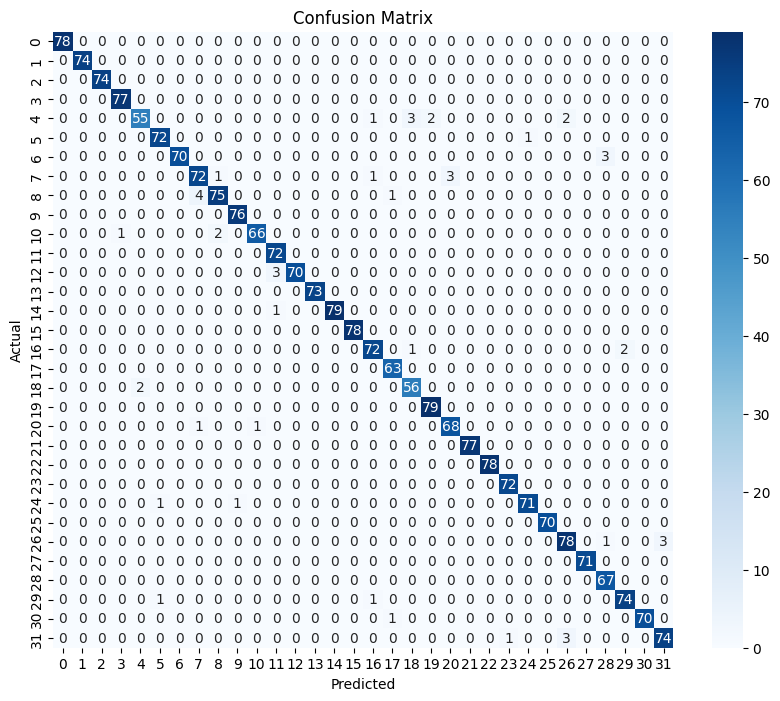

In [ ]:
from ultralytics import YOLO
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path

# Load the trained YOLO model
# Check if the best.pt file exists, if not, use the last.pt file instead
model_path = '/kaggle/working/runs/train/best_model_2_fromYolo11/weights/best.pt'
if not os.path.exists(model_path):
    model_path = '/kaggle/working/runs/train/best_model_2_fromYolo11/weights/last.pt'
    print(f"Warning: 'best.pt' not found, using 'last.pt' instead.")

model = YOLO(model_path)

# Define paths to the test dataset
test_images_dir = '/content/datasets/test/images'
test_labels_dir = '/content/datasets/test/labels'

# Load test images
test_images = list(Path(test_images_dir).glob('*.jpg'))  # Adjust for PNG if necessary

# Initialize storage for predictions and ground truth
all_preds = []
all_targets = []

# Perform inference and calculate metrics ##ai##
for image_path in test_images:
    # Predict with the model
    results = model.predict(source=str(image_path), save=False, conf=0.25)

    # Extract predictions
    predicted_boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding box predictions
    predicted_classes = results[0].boxes.cls.cpu().numpy().astype(int)  # Predicted class IDs
    # Load corresponding ground truth labels
    label_file = os.path.join(test_labels_dir, os.path.basename(image_path).replace('.jpg', '.txt'))
    if not os.path.exists(label_file):
        continue  # Skip if label file does not exist

    with open(label_file, 'r') as f:
        ground_truth_classes = [int(line.split()[0]) for line in f.readlines()]  # Extract class IDs

    # Match predictions to ground truth (simplified: one-to-one match by order)
    # Assumes the same number of predictions as ground truth for simplicity
    for pred_class, true_class in zip(predicted_classes, ground_truth_classes):
        all_preds.append(pred_class)
        all_targets.append(true_class)

# Calculate Metrics
accuracy = accuracy_score(all_targets, all_preds)
precision = precision_score(all_targets, all_preds, average='weighted', zero_division=0)
recall = recall_score(all_targets, all_preds, average='weighted', zero_division=0)
f1 = f1_score(all_targets, all_preds, average='weighted', zero_division=0)

# Confusion Matrix
conf_matrix = confusion_matrix(all_targets, all_preds)

# Print Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix (Array Format):")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(all_targets), yticklabels=np.unique(all_targets))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import shutil
source_path = '/kaggle/working/runs/train/best_model_2_fromYolo11/weights/best.pt'
if not os.path.exists(source_path):
    source_path = '/kaggle/working/runs/train/best_model_2_fromYolo11/weights/last.pt'
    print(f"Warning: 'best.pt' not found, using 'last.pt' instead.")

destination_path = '/content/drive/MyDrive/best_model_2_fromYolo11.pt'


shutil.copy(source_path, destination_path)
print("Best weights saved to Google Drive!")

Best weights saved to Google Drive!
